In [3]:
cd ../TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [4]:
%pylab inline
%load_ext autoreload
%autoreload 2
from TileEM_plot_toolbox import *
from scatter_toolbox import * 

Populating the interactive namespace from numpy and matplotlib


In [5]:
cd final_all_tiles/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/final_all_tiles


In [6]:
df = pd.read_csv("../final_all_tiles/all_1to22_tile_combo_metric_area.csv",index_col=0)

In [20]:
df = pd.read_csv("../final_all_tiles/new_combo_area_metric.csv",index_col=0)

In [21]:
df =df[df["Precision"]!=-1]
df =df[df["Recall"]!=-1]

In [22]:
df = df.drop("Average gamma value",axis=1)
df = df.drop("Total gamma value",axis=1)

In [23]:
# df["likelihoodGTLSA[Athres>1]"]=e**df["pTprimeGTLSA[Athres>1]"]
# df["likelihoodGTLSA[Athres>5]"]=e**df["pTprimeGTLSA[Athres>5]"]
# df["likelihoodGTLSA[Athres>10]"]=e**df["pTprimeGTLSA[Athres>10]"]

In [101]:
df_obj = df[df["objid"]==1]

In [102]:
keys= df.keys()[6:]
correlation = df_obj[keys].corr('pearson')
correlation

,pTprimeGTLSA[Athres>1],pTprimeGTLSA[Athres>5],pTprimeGTLSA[Athres>10],Precision,Recall,Jaccard
pTprimeGTLSA[Athres>1],1.000000,0.999235,0.998531,-0.039814,-0.572711,-0.281636
pTprimeGTLSA[Athres>5],0.999235,1.000000,0.999845,-0.042934,-0.572666,-0.286472
pTprimeGTLSA[Athres>10],0.998531,0.999845,1.000000,-0.045684,-0.574494,-0.290329
Precision,-0.039814,-0.042934,-0.045684,1.000000,0.458415,0.869412
Recall,-0.572711,-0.572666,-0.574494,0.458415,1.000000,0.702952
Jaccard,-0.281636,-0.286472,-0.290329,0.869412,0.702952,1.000000


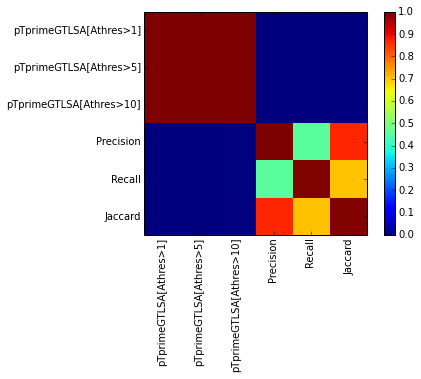

In [103]:
plt.imshow(correlation.as_matrix(),interpolation="None")
ticks=np.arange(0,shape(correlation)[0])
plt.xticks(ticks, keys, rotation='vertical')
plt.yticks(ticks, keys, rotation='horizontal')
plt.colorbar()
plt.clim(0,1)

##### Qualitatively if we look at the table data, p(T') seems to be correlated with recall in general

but there seems to be many cases where you can have low recall but still decently high p(T')

In [106]:
df_obj = df[df["objid"]==3]

---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>1]'];y=['Jaccard']
Coefficients:  [[-0.00087888]]
Mean squared error: 0.06
R^2: 0.41
---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>5]'];y=['Jaccard']
Coefficients:  [[-0.00120667]]
Mean squared error: 0.06
R^2: 0.40
---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>10]'];y=['Jaccard']
Coefficients:  [[-0.00124723]]
Mean squared error: 0.07
R^2: 0.42


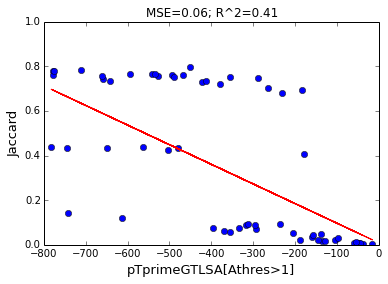

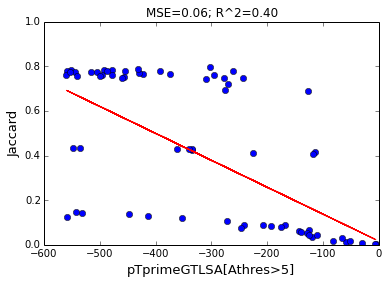

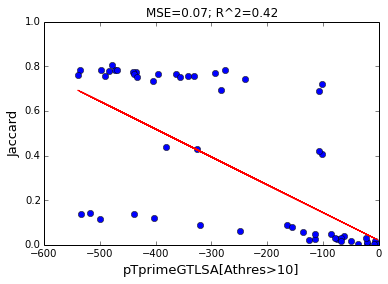

In [107]:
for threshold in [1,5,10]:
    x_attr = ["pTprimeGTLSA[Athres>{}]".format(threshold)]
    y_attr = ["Jaccard"]
    regression_results(df_obj,x_attr,y_attr,PLOT=True)

---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>1]'];y=['Recall']
Coefficients:  [[-0.00104564]]
Mean squared error: 0.08
R^2: 0.39
---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>5]'];y=['Recall']
Coefficients:  [[-0.00142089]]
Mean squared error: 0.08
R^2: 0.39
---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>10]'];y=['Recall']
Coefficients:  [[-0.00140047]]
Mean squared error: 0.08
R^2: 0.40


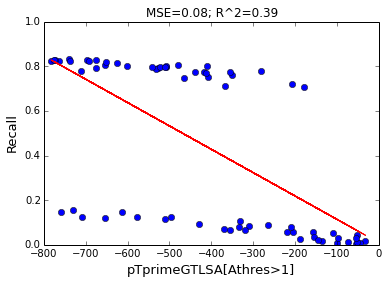

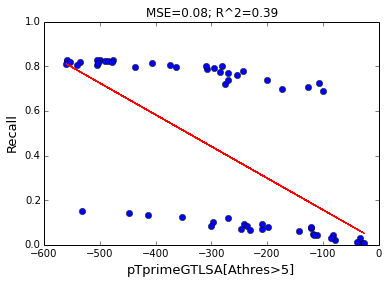

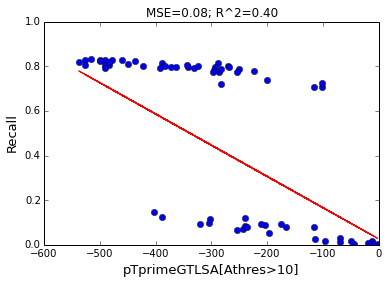

In [108]:
for threshold in [1,5,10]:
    x_attr = ["pTprimeGTLSA[Athres>{}]".format(threshold)]
    y_attr = ["Recall"]
    regression_results(df_obj,x_attr,y_attr,PLOT=True)

---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>1]'];y=['Precision']
Coefficients:  [[-0.0002297]]
Mean squared error: 0.03
R^2: 0.20
---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>5]'];y=['Precision']
Coefficients:  [[-0.00039652]]
Mean squared error: 0.03
R^2: 0.04
---------------------------------------------
Regression x=['pTprimeGTLSA[Athres>10]'];y=['Precision']
Coefficients:  [[-0.00044214]]
Mean squared error: 0.02
R^2: -0.35


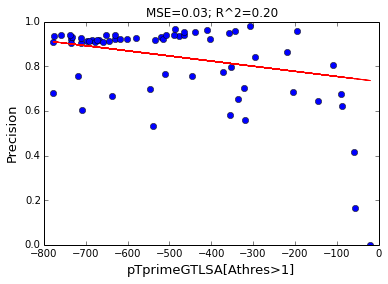

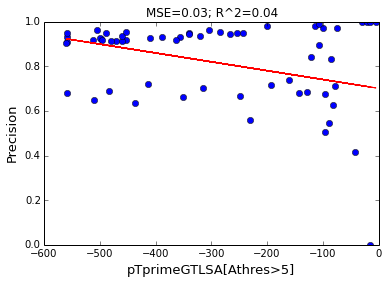

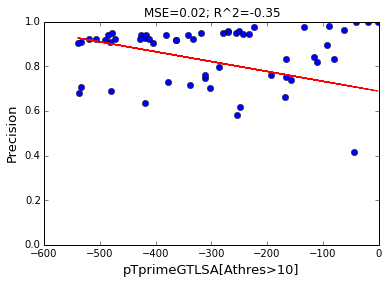

In [110]:
for threshold in [1,5,10]:
    x_attr = ["pTprimeGTLSA[Athres>{}]".format(threshold)]
    y_attr = ["Precision"]
    regression_results(df_obj,x_attr,y_attr,PLOT=True)

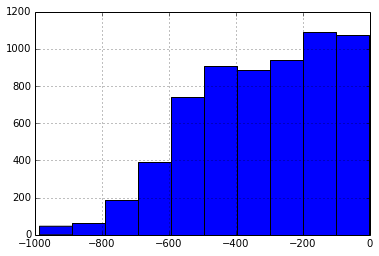

In [30]:
df["pTprimeGTLSA[Athres>5]"].hist()

In [91]:
def scatterplot(df,x_attr,y_attr,z_attr,z_data="",bucketize=True,cmap = plt.cm.rainbow):
    fig=plt.figure()

    
    plt.xlim(0,1.03)
    plt.ylim(0,1.03)
    plt.xlabel(x_attr,fontsize=14)
    plt.ylabel(y_attr,fontsize=14)
    plt.title(z_attr,fontsize=15)
    if bucketize:
        bounds = np.sort(list(set(bucketized_data)))
        norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
        plt.scatter(df[x_attr],df[y_attr],c=z_data,edgecolors='none',alpha=0.7,cmap=cmap,norm=norm)        
        ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.8])
        matplotlib.colorbar.ColorbarBase(ax2,cmap=cmap, norm=norm, spacing='proportional', ticks=bounds, boundaries=bounds)#, format='%1i')
    else:
        plt.scatter(df[x_attr],df[y_attr],c=df[z_attr],edgecolors='none',alpha=0.7,cmap=cmap)
        plt.colorbar()
#         plt.clim(0,1)


In [97]:
df.sort("Recall")[::-1]

,objid,T prime,Total Votes,Average Votes,Total area,Average area,pTprimeGTLSA[Athres>1],pTprimeGTLSA[Athres>5],pTprimeGTLSA[Athres>10],Precision,Recall,Jaccard
2829,10,"[5049, 5900, 2730, 1326, 5045, 5850, 5048, 411...",1262,33.210526,16928.380325,445.483693,-619.905279,-449.042086,-387.894413,0.986081,0.921267,0.909440
2967,10,"[5497, 2730, 5236, 2477, 2731, 4688, 2728, 550...",1265,32.435897,16870.639856,432.580509,-647.743629,-477.603875,-414.325459,0.984709,0.921267,0.908273
2702,10,"[3216, 1952, 5874, 2728, 2477, 1327, 4112, 195...",1264,32.410256,16935.629089,434.246900,-649.560922,-479.301605,-415.456861,0.984703,0.921267,0.908268
2998,10,"[4112, 5500, 2731, 2477, 919, 2730, 5852, 5496...",1265,32.435897,16618.026804,426.103251,-648.896553,-477.930126,-413.693273,0.984709,0.921267,0.908273
2906,10,"[5852, 5500, 5502, 2727, 5850, 2728, 2477, 549...",1302,33.384615,16954.269214,434.724852,-631.176770,-455.136429,-392.375654,0.986081,0.921267,0.909440
2784,10,"[1998, 5494, 4693, 2731, 1955, 4180, 4112, 321...",1265,32.435897,16865.237467,432.441986,-647.743629,-477.603875,-414.325459,0.984709,0.921267,0.908273
2975,10,"[919, 2731, 2477, 1952, 5502, 5906, 1955, 1951...",1219,32.945946,16727.381457,452.091391,-613.704407,-448.601235,-388.590632,0.986111,0.921267,0.909465
2807,10,"[5236, 2727, 5050, 5906, 4112, 207, 1998, 4695...",1182,32.833333,16506.587771,458.516327,-593.957313,-436.688738,-380.955498,0.986682,0.921267,0.909951
2761,10,"[1951, 2727, 5540, 4693, 5850, 2477, 5900, 199...",1225,32.236842,16833.627282,442.990192,-635.265271,-471.907979,-410.237848,0.986688,0.921250,0.909940
2782,10,"[4693, 4112, 4625, 5388, 5851, 5390, 1998, 587...",1222,33.027027,16802.705855,454.127185,-604.946326,-442.459178,-384.430676,0.986688,0.921245,0.909935


In [117]:
t_area = [t.area for t in tiles]

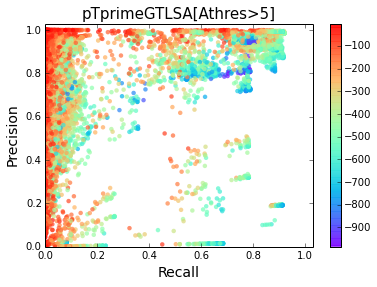

In [34]:
scatterplot(df,"Recall","Precision","pTprimeGTLSA[Athres>5]",bucketize=False)

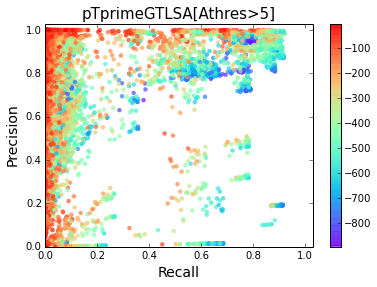

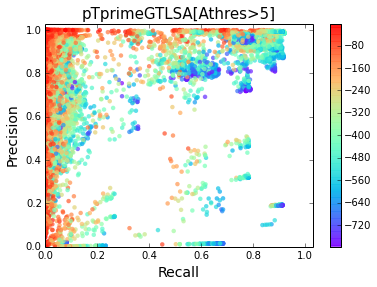

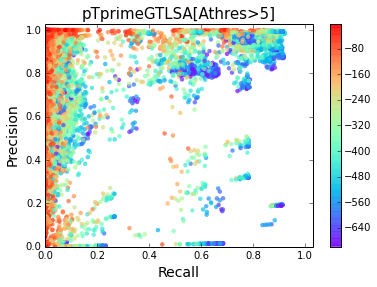

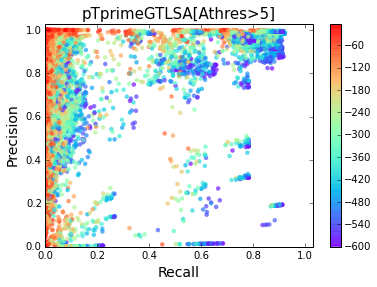

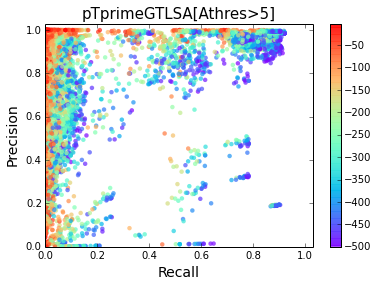

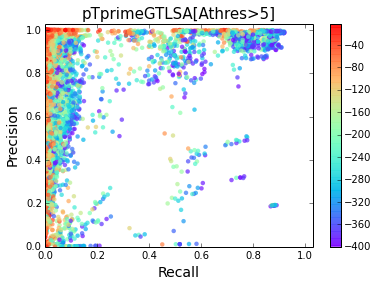

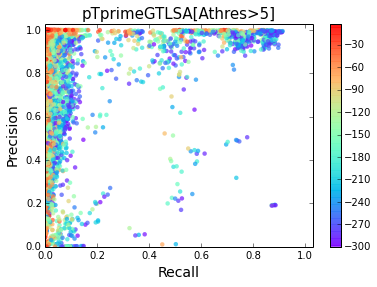

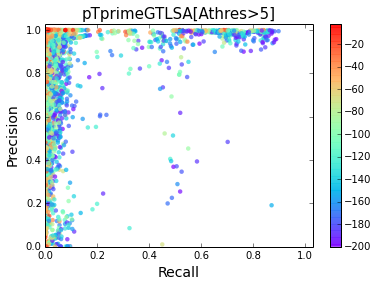

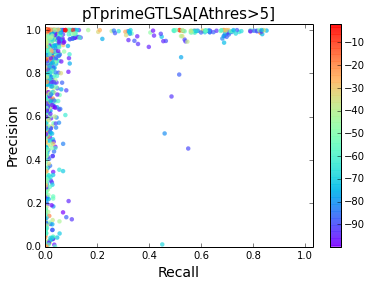

In [40]:
for thres in np.arange(-900,0,100):
    filtered_df = df[df["pTprimeGTLSA[Athres>5]"]>thres]
    #bucketized_data = bucketize(Q1_filtered_df["Q2[A<10]"],5)
    #scatterplot(Q1_filtered_df,"Recall","Precision","Q2[A<10]",bucketized_data,bucketize=True)
    scatterplot(filtered_df,"Recall","Precision","pTprimeGTLSA[Athres>5]",bucketize=False)

In [82]:
def bucketize(data,Nbuckets):
    delta = (max(data)-min(data))/Nbuckets
    bucketized_data = []
    start=0
    end=delta
    for val in data:
        start=0
        end=delta
        #print "val: ",val
        for i in range(Nbuckets+3):
            #print start,end
            if val<=start and i==0:
                bucketized_data.append(0)
                break
            if val>=start and val<end:
                #print"added"
                bucketized_data.append(start)
                break
            else:
                start=end
                end+=delta
            if i==Nbuckets+2:
                bucketized_data.append(end)
    #print len(bucketized_data),len(data)
    assert len(bucketized_data)==len(data)
    return bucketized_data

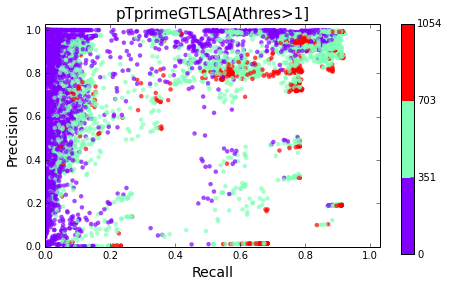

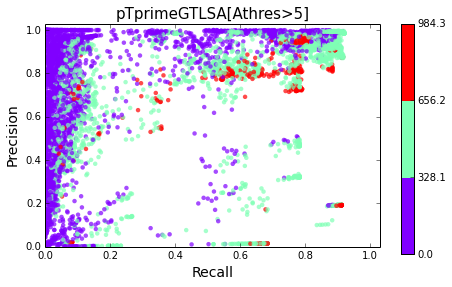

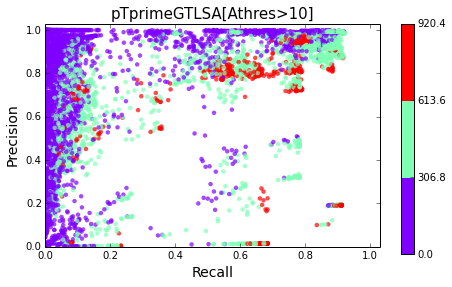

In [94]:
for thres in [1,5,10]:
    z_attr="pTprimeGTLSA[Athres>{}]".format(thres)
    bucketized_data = bucketize(abs(df[z_attr]),3)
    scatterplot(df,"Recall","Precision",z_attr,bucketized_data,bucketize=True)

----------------------------------------------------------------------

In [96]:
def compute_jaccard(objid,solnset,tiles):
    '''
    Compute Jaccard Index against ground truth bounding box
    for a given solution set and tile coordinates.
    '''
    if len(solnset)==1:
        joined_bb=tiles[solnset[0]]
        problematic_tiles=[]
    else:
        try:
            joined_bb,problematic_tiles = join_tiles(solnset,tiles)
        except(ValueError):
            return -1,-1
    ground_truth_match = my_BBG[my_BBG.object_id==objid]
    x_locs,y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
    BBG = shapely.geometry.Polygon(zip(x_locs,y_locs))
    if problematic_tiles!=[]:
        intersect_area =0
        joined_bb_area =0
        for jbb in joined_bb:
            ia = intersection_area(BBG,jbb)
            intersect_area += ia
            joined_bb_area += jbb.area
    else:
        intersect_area=intersection_area(BBG,joined_bb)
        joined_bb_area =joined_bb.area
    union = shapely.ops.unary_union([Tprime,BBG])
    jaccard = intersect_area/float(union.area)
    return jaccard

In [78]:
ground_truth_match = my_BBG[my_BBG.object_id==objid]
x_locs,y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
BBG = shapely.geometry.Polygon(zip(x_locs,y_locs))

Tprime=join_tiles(Tprime_idx,tiles)[0]

In [91]:
jaccard = compute_jaccard(objid,Tprime_idx,tiles)
print jaccard

ERROR:shapely.geos:TopologyException: found non-noded intersection between LINESTRING (316.737 150.053, 320.667 148.333) and LINESTRING (318.8 149.64, 322.261 147.217) at 320.66666666666669 148.33333333333331


0.0124761781465
